# Clasificación de textos utilizando Codificación Universal (compresión)

En el presente trabajo se utilizaron textos del dataset http://qwone.com/~jason/20Newsgroups/

### scripts para poder pasar archivos del drive a Colab

In [37]:
!apt-get update -qq 2>&1 > /dev/null
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse

gpg: keybox '/tmp/tmp8akonqfc/pubring.gpg' created
gpg: /tmp/tmp8akonqfc/trustdb.gpg: trustdb created
gpg: key AD5F235DF639B041: public key "Launchpad PPA for Alessandro Strada" imported
gpg: Total number processed: 1
gpg:               imported: 1


In [0]:
!pip install -U -q PyDrive ## you will have install for every colab session

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()


creds = GoogleCredentials.get_application_default()
import getpass
# Work around misordering of STREAM and STDIN in Jupyter.
# https://github.com/jupyter/notebook/issues/3159
prompt = !google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass(prompt[0] + '\n\nEnter verification code: ')
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

In [0]:
# Create a directory and mount Google Drive using that directory.
!mkdir -p drive
!google-drive-ocamlfuse drive

print 'Files in Drive:'
!ls drive

In [0]:
import os
import pdb

!rm -r teo_info/
!cp -r drive/teo_info/ teo_info/
os.chdir('teo_info')

Se utiliza la herramienta $\textit{7z}$ para comprimir

### Para descomprimir la data

In [0]:
!7z x comp.7z -ocomp/
!7z x rec.7z -orec/
!7z x sci.7z -osci/
!7z x politics.7z -opolitics/

!rm *.7z

In [24]:
!ls -l rec.7z

-rw-r--r-- 1 root root 1376673 Aug 19 15:44 rec.7z


### Es necesario comprimir con el comando 7z para las pruebas

In [67]:
!7z a -t7z comp.7z comp/
!7z a -t7z rec.7z rec/
!7z a -t7z politics.7z politics/
!7z a -t7z sci.7z sci/
!ls

0  3		    comp.7z	 rec	 sci.7z
1  clasificador.py  politics	 rec.7z  teo_info_clasificacion.ipynb
2  comp		    politics.7z  sci


## Algoritmo de clasificación

El siguiente algoritmo esta pensado para 4 topicos, pero se puede extender facilmente, solo se deben agregar más topicos al diccionario inicial y a la lista de topicos del ciclo $for$.
Previamente se tiene que tener el conjunto a clasificar en las carpetas 0,1,2,3 las cuales sirven de etiqueta, para luego calcular el accuracy.

In [68]:
dict_equiv = {
  '0':'comp',
  '1':'politics',
  '2':'rec',
  '3':'sci'
}

total_cnt = 0
correct_cases = 0
correct_per_topic = []

for x in ['0', '1', '2', '3']:
  files = os.listdir("./"+x)
  c_per_topic = 0
  for file in files:
    file_path = x + "/" + file
    diff = 999999999999999
    min_topic = -1
    
    for idx, topic in enumerate(['comp', 'politics', 'rec', 'sci']):
      os.system("7z a " + topic + "_test.7z " + file_path + " " + topic)
      
      # se calcula la tasa de compresión condicional
      # y se guarda la mínima
      test_size = os.path.getsize(topic + "_test.7z")
      orig_size = os.path.getsize(topic + ".7z")
      curr_diff = test_size - orig_size
      
      if (curr_diff < diff):
        diff = curr_diff
        min_topic = idx
      os.system("rm " + topic + "_test.7z")    
    
    total_cnt += 1
    print("Cuenta: " + str(total_cnt))

    if (min_topic == int(x)):
      c_per_topic += 1
      correct_cases += 1    
      
    
  print("Topico: " + x)
  correct_per_topic.append(c_per_topic)

print("El accuracy final es " + str(correct_cases) + " casos correctos de un total de " + str(total_cnt))
for c_per_topic in correct_per_topic:
  print("Per topic correct: " + str(c_per_topic))

Cuenta: 1
Cuenta: 2
Cuenta: 3
Cuenta: 4
Cuenta: 5
Cuenta: 6
Cuenta: 7
Cuenta: 8
Cuenta: 9
Cuenta: 10
Cuenta: 11
Cuenta: 12
Cuenta: 13
Cuenta: 14
Cuenta: 15
Cuenta: 16
Cuenta: 17
Cuenta: 18
Cuenta: 19
Cuenta: 20
Cuenta: 21
Cuenta: 22
Cuenta: 23
Cuenta: 24
Cuenta: 25
Cuenta: 26
Cuenta: 27
Cuenta: 28
Cuenta: 29
Cuenta: 30
Cuenta: 31
Cuenta: 32
Cuenta: 33
Cuenta: 34
Cuenta: 35
Cuenta: 36
Cuenta: 37
Cuenta: 38
Cuenta: 39
Cuenta: 40
Cuenta: 41
Cuenta: 42
Cuenta: 43
Cuenta: 44
Cuenta: 45
Cuenta: 46
Cuenta: 47
Cuenta: 48
Cuenta: 49
Cuenta: 50
Cuenta: 51
Cuenta: 52
Cuenta: 53
Cuenta: 54
Cuenta: 55
Cuenta: 56
Cuenta: 57
Cuenta: 58
Cuenta: 59
Cuenta: 60
Cuenta: 61
Cuenta: 62
Cuenta: 63
Cuenta: 64
Cuenta: 65
Cuenta: 66
Cuenta: 67
Cuenta: 68
Cuenta: 69
Cuenta: 70
Cuenta: 71
Cuenta: 72
Cuenta: 73
Cuenta: 74
Cuenta: 75
Cuenta: 76
Cuenta: 77
Cuenta: 78
Cuenta: 79
Cuenta: 80
Topico: 0
Cuenta: 81
Cuenta: 82
Cuenta: 83
Cuenta: 84
Cuenta: 85
Cuenta: 86
Cuenta: 87
Cuenta: 88
Cuenta: 89
Cuenta: 90
Cuenta: 9

# Convergencia del algoritmo de compresión

Se estudia la convergencia del algoritmo, calculando la tasa de compresión condicional a medida que se agregan archivos a la compresión.
En este caso se utilizó el tópico "talk.politics.mideast", eligiendo al azar un archivo del conjunto y comprimiendolo con otros archivos del mismo tópico. En teoría la tasa de compresión condicional se puede reducir asintóticamente a cero.

In [20]:
import os
import pdb
import matplotlib.pyplot as plt
import numpy as np

In [3]:
os.chdir('convergencia')
!ls

19     set_1.7z  set_2.7z  set_3.7z  set_4.7z  set_5.7z
set_1  set_2	 set_3	   set_4     set_5


In [7]:
studySets = ['set_1', 'set_2', 'set_3', 'set_4', 'set_5']
fileName = 'test_file'
file_numbers = [50, 100, 200, 400, 800]

In [25]:
list_sizes = []

for curr_set in studySets:
  os.system("7z a " + curr_set + "_test.7z " + fileName + " " + curr_set)
      
  # se calcula la tasa de compresión condicional
  # y se guarda en un arreglo
  test_size = os.path.getsize(curr_set + "_test.7z")
  orig_size = os.path.getsize(curr_set + ".7z")
  curr_diff = (test_size - orig_size)*1.0/1000
  list_sizes.append(curr_diff)
    
  os.system("rm " + curr_set + "_test.7z")

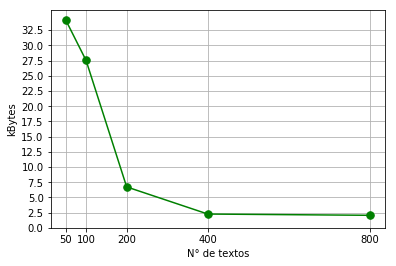

In [35]:
plt.figure()
plt.grid()
plt.plot(file_numbers,list_sizes, '.-g', markersize=15)
plt.xticks([50,100,200,400,800])
plt.yticks(np.arange(0, 35, step=2.5))
plt.xlabel("N° de textos")
plt.ylabel("kBytes")
plt.savefig('convergencia.pdf')